In [1]:
import os

In [2]:
os.chdir("C:/Users/pavan/titanic")

In [3]:
# Import all the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Loading the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
# Viewing the first 5 rows of the dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Check train samples
train.shape

(891, 12)

In [7]:
# Check train samples
test.shape

(418, 11)

In [8]:
#Statistical info

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***Exploratory Data Analysis***

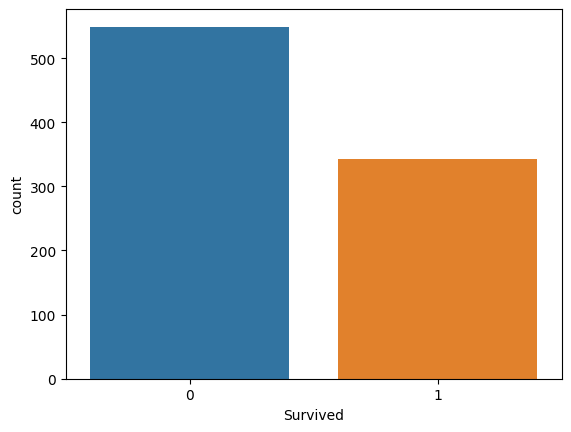

In [10]:
# Plotting categoricals
sns.countplot(x=train['Survived'])
plt.show()

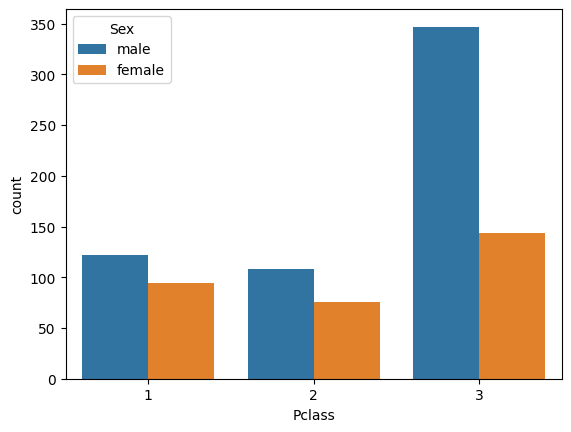

In [11]:
sns.countplot(x=train['Pclass'],hue=train['Sex'])
plt.show()

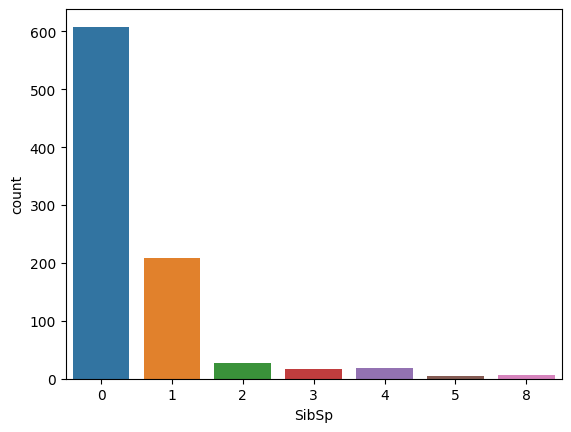

In [12]:
sns.countplot(x=train['SibSp'])
plt.show()

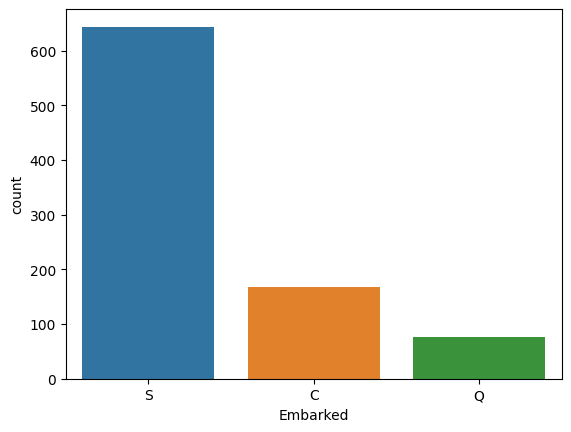

In [13]:
sns.countplot(x=train['Embarked'])
plt.show()

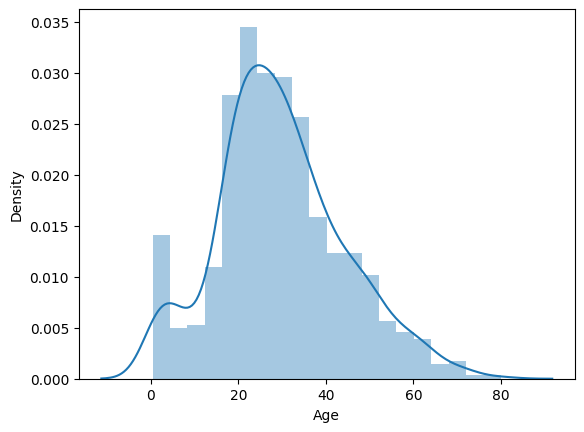

In [14]:
# Plotting Numerical Attributes and ignoring warnings

import warnings
warnings.filterwarnings('ignore')

sns.distplot(train['Age'])
plt.show()

[]

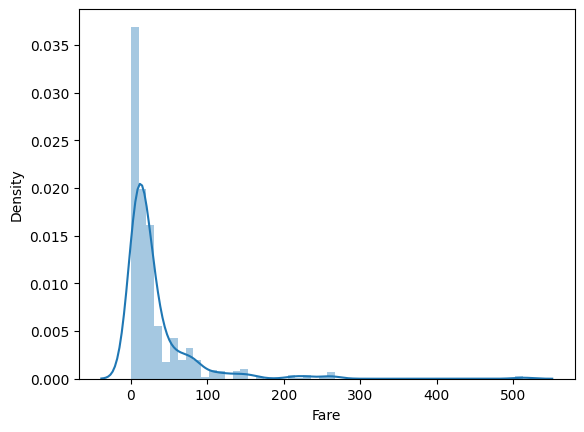

In [15]:
sns.distplot(train['Fare'])
plt.plot()

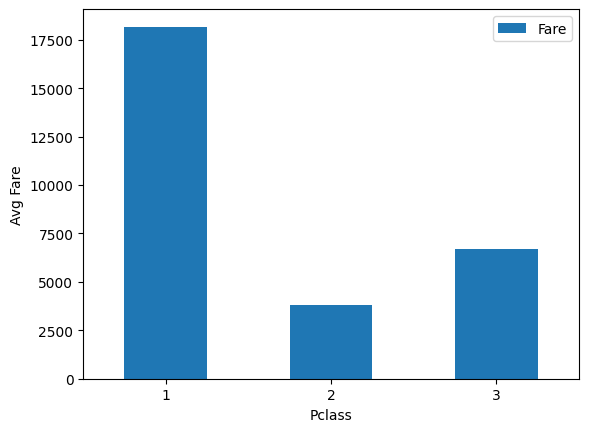

In [16]:
# Plotting bar chart Pclass vs average fare
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg Fare')
plt.xticks(rotation=0)
plt.show()

***Preprocessing***

In [17]:
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [18]:
# Checking the null values

df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [19]:
# Dropping all the null values from cabin column

df.drop(columns='Cabin', axis=1, inplace=True)

In [20]:
# Filling the null values with median in Age and fare columns

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [21]:
# Filling null values with mode as Embarked column is categorical

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [22]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


*As we're having right skew in the fare column, let's normalize it and make it near normal distribution. Most popular method is log transformation*`

***Log Transformation for Uniform distribution***

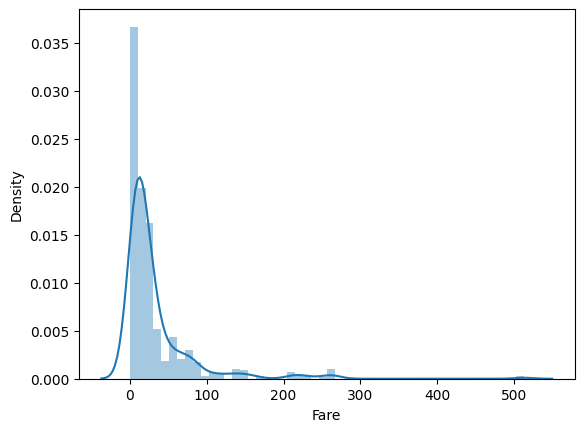

In [23]:
sns.distplot(df['Fare'])
plt.show()

In [24]:
df['Fare'] = np.log(df['Fare']+1)

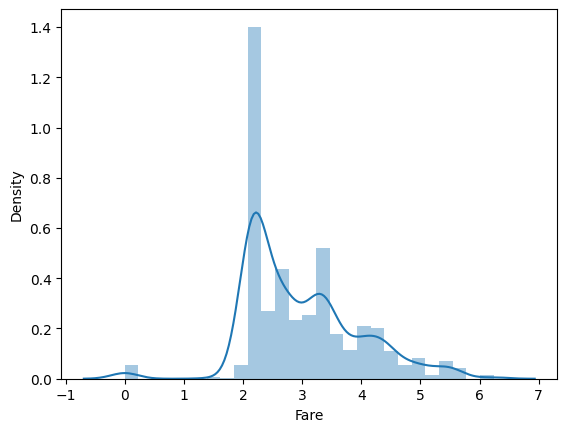

In [25]:
# Here the bell is in the centre of the graph
sns.distplot(df['Fare'])
plt.show()

In [26]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S


In [27]:
# Drop unnecessary columns

df.drop(columns=['Name', 'Ticket'], axis=1, inplace=True)

***Encoding***

In [28]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
    

In [29]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2


***Correlation Matrix***

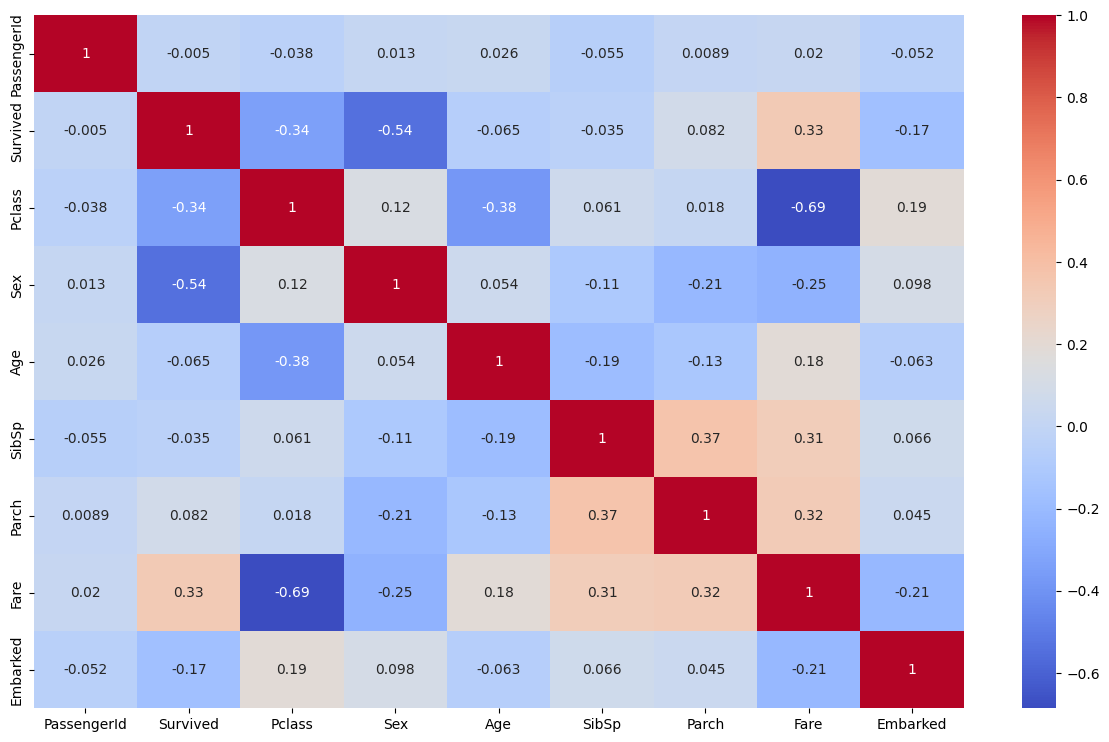

In [30]:
# All the columns are numericals. Now we can do correlation matrix

corr = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

***Train-Test Split***

In [31]:
#Input Output split

X = df.drop(columns=['PassengerId', 'Survived', 'SibSp', 'Embarked', 'Parch'], axis=1)
y = df['Survived']

In [32]:
# y has so many missing values. Let's fill with the mode
y.fillna(0, inplace=True)

## Model Training

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix

def classify(model):
    """Splits X and y by training the model and gives accuracy along with confusion matrix"""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)*100
    print("Here's your Accuracy(%):", round(score))
    
    score = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    new_score = round(np.mean(score)*100)
    print("And the CV Score(%):", new_score)
    
    y_pred = cross_val_predict(model, X, y, cv=10)
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='3.0f', cmap="summer")
    plt.title('Confusion_matrix for the chosen model', y=1.05, size=15)
    

***Logistic Regression***

Here's your Accuracy(%): 77
And the CV Score(%): 78


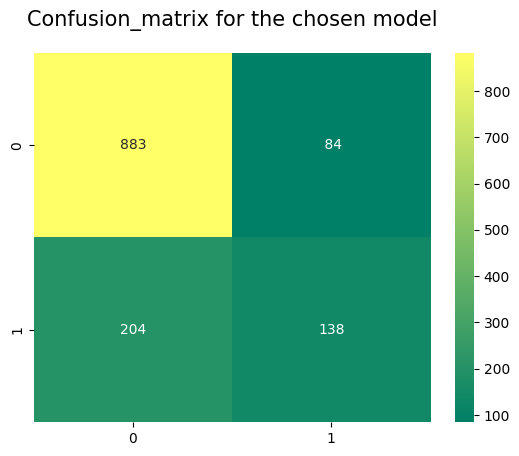

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

***Decision Tree***

Here's your Accuracy(%): 76
And the CV Score(%): 75


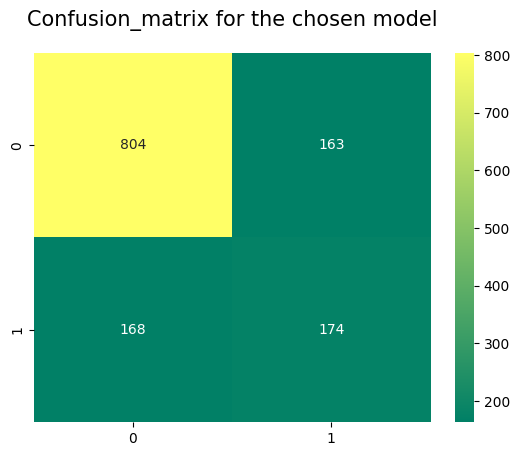

In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

***Random Forest***

Here's your Accuracy(%): 79
And the CV Score(%): 77


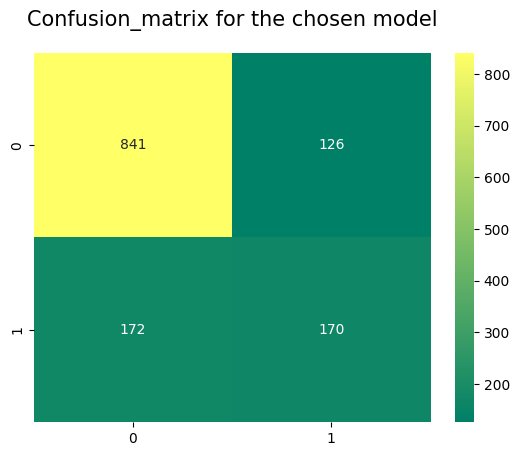

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classify(model)

***Gaussian Naive Bayes***

Here's your Accuracy(%): 74
And the CV Score(%): 76


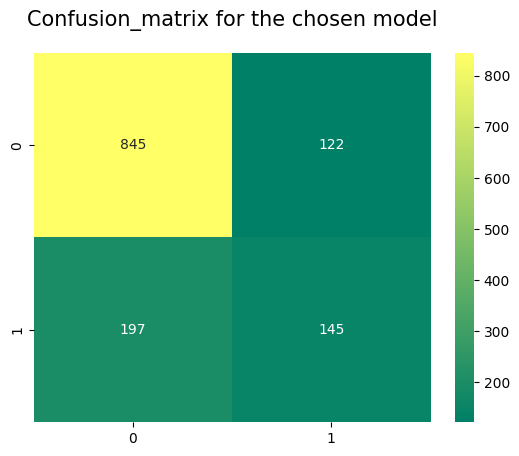

In [37]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classify(model)

***KNeighborsClassifier***

Here's your Accuracy(%): 77
And the CV Score(%): 76


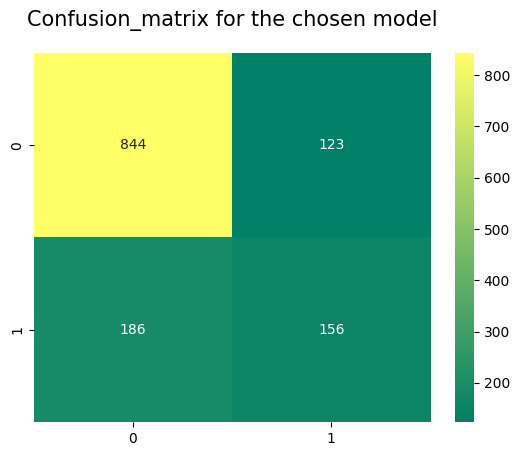

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model)

***Support Vector Matrix***

Here's your Accuracy(%): 72
And the CV Score(%): 74


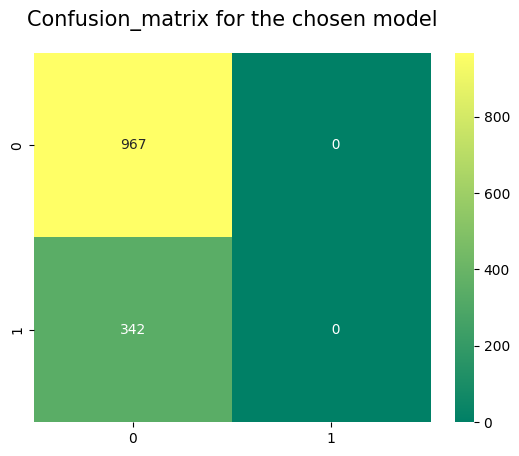

In [39]:
from sklearn.svm import SVC
model = SVC()
classify(model)